> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.


1. What measures indicate strong commercial success. Dismiss popularity - how would you have measured this in the past?
2. For a movie with strong commercial success based on outcomes of question 1, when are they likely be be released during the year?
3. What other factors contribute to movie success?

In [977]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from datetime import datetime

% matplotlib inline
pd.options.display.float_format = "{:,.2f}".format

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [978]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('C:/Users/MyTecra/Downloads/Udacity - Data Analytics/Project 3 - Investigate a Dataset/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,"137,999,939.28","1,392,445,892.52"
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,"137,999,939.28","348,161,292.49"
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,"101,199,955.47","271,619,025.41"
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,"183,999,919.04","1,902,723,129.80"
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,"174,799,923.09","1,385,748,801.47"


In [979]:
print(df.shape)
print('')
df.info()

(10866, 21)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj  

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [980]:
# Check duplicates
print(df.duplicated().sum())
df[df.duplicated()]

1


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.60,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.00,2010,"30,000,000.00","967,000.00"


In [981]:
# Only 1 duplicate -let's see what it is
df.query('original_title == "TEKKEN"')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.60,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.00,2010,"30,000,000.00","967,000.00"
2090,42194,tt0411951,0.60,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.00,2010,"30,000,000.00","967,000.00"


In [982]:
#The above indicates there is only one duplicate row. So we will drop this.
# save to df which will have filtered / modified data
df.drop_duplicates(keep ='first', inplace=True)
df.duplicated().sum()

0

In [925]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,"10,865.00","10,865.00","10,865.00","10,865.00","10,865.00","10,865.00","10,865.00","10,865.00","10,865.00","10,865.00"
mean,"66,066.37",0.65,"14,624,286.06","39,826,896.08",102.07,217.40,5.98,"2,001.32","17,549,894.04","51,369,001.76"
std,"92,134.09",1.00,"30,914,284.61","117,008,277.46",31.38,575.64,0.94,12.81,"34,307,526.66","144,638,333.13"
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,"1,960.00",0.00,0.00
25%,"10,596.00",0.21,0.00,0.00,90.00,17.00,5.40,"1,995.00",0.00,0.00
50%,"20,662.00",0.38,0.00,0.00,99.00,38.00,6.00,"2,006.00",0.00,0.00
75%,"75,612.00",0.71,"15,000,000.00","24,000,000.00",111.00,146.00,6.60,"2,011.00","20,853,251.08","33,701,729.01"
max,"417,859.00",32.99,"425,000,000.00","2,781,505,847.00",900.00,"9,767.00",9.20,"2,015.00","425,000,000.00","2,827,123,750.41"


In [983]:
df['release_year'].value_counts().sort_index()

1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     40
1968     39
1969     31
1970     41
1971     55
1972     40
1973     55
1974     47
1975     44
1976     47
1977     57
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    105
1985    109
1986    121
1987    125
1988    145
1989    137
1990    132
1991    133
1992    133
1993    178
1994    184
1995    175
1996    204
1997    192
1998    210
1999    224
2000    227
2001    242
2002    266
2003    281
2004    307
2005    364
2006    408
2007    438
2008    496
2009    533
2010    489
2011    540
2012    588
2013    659
2014    700
2015    629
Name: release_year, dtype: int64

In [984]:
# convert time
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_month'] = df['release_date'].dt.month
print(df[['release_date','release_year','release_month']].dtypes)
df.head(2)

release_date     datetime64[ns]
release_year              int64
release_month             int64
dtype: object


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.50,2015,"137,999,939.28","1,392,445,892.52",6
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.10,2015,"137,999,939.28","348,161,292.49",5


In [986]:
# the release_year for the above doesn't match the release_date. Which is correct? Wikipedia says 2015. Of course this doesn't include movies re-released at different points in time. But we'll assume this is the initial release year of the movie.
#df['release_year'] = df['release_date'].dt.year
df['year_temp'] = df['release_date'].dt.year

#convert to same data type
df['year_temp'] = df['year_temp'].apply(int) 

df['year_temp'].value_counts().sort_index()


#df.query('year_temp' > '2014')
#df[(df['release_date'].dt.year != df['release_year'].dt.year)]
#now it is fixed

1968     39
1969     31
1970     41
1971     55
1972     40
1973     55
1974     47
1975     44
1976     47
1977     57
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    105
1985    109
1986    121
1987    125
1988    145
1989    137
1990    132
1991    133
1992    133
1993    178
1994    184
1995    175
1996    204
1997    192
1998    210
1999    224
2000    227
2001    242
2002    266
2003    281
2004    307
2005    364
2006    408
2007    438
2008    496
2009    533
2010    489
2011    540
2012    588
2013    659
2014    700
2015    629
2060     32
2061     31
2062     32
2063     34
2064     42
2065     35
2066     46
2067     40
Name: year_temp, dtype: int64

In [987]:
# now we need to clean up years 2060-2067. It would be better to use release_year for this.
df.loc[df['year_temp'] >= 2060, 'year_temp'] = df['release_year']

#check if fixed
df['year_temp'].value_counts().sort_index()

1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     40
1968     39
1969     31
1970     41
1971     55
1972     40
1973     55
1974     47
1975     44
1976     47
1977     57
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    105
1985    109
1986    121
1987    125
1988    145
1989    137
1990    132
1991    133
1992    133
1993    178
1994    184
1995    175
1996    204
1997    192
1998    210
1999    224
2000    227
2001    242
2002    266
2003    281
2004    307
2005    364
2006    408
2007    438
2008    496
2009    533
2010    489
2011    540
2012    588
2013    659
2014    700
2015    629
Name: year_temp, dtype: int64

In [988]:
# convert to strings for concatenation
df['release_date'] = df['release_date'].astype(str)
df['year_temp'] = df['year_temp'].astype(str)

In [989]:
# remove the year from release date
df['release_date'] = df['release_date'].apply(lambda x: x[4:])

In [990]:
# add the year with the correct one
df['release_date'] = df['year_temp'] + df['release_date']

In [933]:
#check
df['release_date'].value_counts().sort_index()

1960-01-01    2
1960-02-11    1
1960-02-22    1
1960-03-01    1
1960-03-27    1
1960-04-06    1
1960-05-18    1
1960-05-19    1
1960-06-15    1
1960-06-19    1
1960-06-21    1
1960-06-24    1
1960-07-01    1
1960-07-13    1
1960-07-20    1
1960-08-05    1
1960-08-10    1
1960-08-14    1
1960-08-17    1
1960-08-29    1
1960-09-09    1
1960-09-14    1
1960-10-06    1
1960-10-07    1
1960-10-13    1
1960-10-23    1
1960-10-24    1
1960-12-18    1
1960-12-20    1
1960-12-21    1
             ..
2015-11-09    1
2015-11-10    2
2015-11-12    3
2015-11-13    6
2015-11-14    1
2015-11-15    1
2015-11-18    1
2015-11-20    4
2015-11-22    1
2015-11-25    2
2015-11-26    3
2015-11-27    4
2015-12-01    2
2015-12-03    1
2015-12-04    4
2015-12-05    1
2015-12-11    6
2015-12-14    1
2015-12-15    1
2015-12-17    1
2015-12-18    2
2015-12-19    2
2015-12-20    1
2015-12-23    2
2015-12-24    2
2015-12-25    4
2015-12-26    1
2015-12-27    1
2015-12-30    1
2015-12-31    2
Name: release_date, Leng

In [991]:
#convert back to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

#change release_year to match the year in release_date
df['release_year'] = df['release_date'].dt.year
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 23 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj       

In [992]:
#check if min / max is ok
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
count,"10,865.00","10,865.00","10,865.00","10,865.00","10,865.00","10,865.00","10,865.00","10,865.00","10,865.00","10,865.00","10,865.00"
mean,"66,066.37",0.65,"14,624,286.06","39,826,896.08",102.07,217.40,5.98,"2,001.32","17,549,894.04","51,369,001.76",6.83
std,"92,134.09",1.00,"30,914,284.61","117,008,277.46",31.38,575.64,0.94,12.81,"34,307,526.66","144,638,333.13",3.44
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,"1,960.00",0.00,0.00,1.00
25%,"10,596.00",0.21,0.00,0.00,90.00,17.00,5.40,"1,995.00",0.00,0.00,4.00
50%,"20,662.00",0.38,0.00,0.00,99.00,38.00,6.00,"2,006.00",0.00,0.00,7.00
75%,"75,612.00",0.71,"15,000,000.00","24,000,000.00",111.00,146.00,6.60,"2,011.00","20,853,251.08","33,701,729.01",10.00
max,"417,859.00",32.99,"425,000,000.00","2,781,505,847.00",900.00,"9,767.00",9.20,"2,015.00","425,000,000.00","2,827,123,750.41",12.00


In [936]:
# How many null values are there in each column?
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
release_month              0
year_temp                  0
dtype: int64

In [937]:
#There are rows with zero dollar values for budget and revenue. Let's remove this.

columns =['budget', 'revenue']

# Replace zero values with NAN and print NA results
df[columns] = df[columns].replace(0, np.NAN)
print(df[columns].isnull().sum())

# Drop rows with NAN for budget_adj and revenue_adj
df.dropna(subset = columns, inplace = True)

print('')
print('Results after removing NA values:')
print(df[columns].isnull().sum())


budget     5696
revenue    6016
dtype: int64

Results after removing NA values:
budget     0
revenue    0
dtype: int64


In [938]:
# No null values against budget, revenue, budget_adj and revenue_adj which is good
# Let's look at the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
count,"3,854.00","3,854.00","3,854.00","3,854.00","3,854.00","3,854.00","3,854.00","3,854.00","3,854.00","3,854.00","3,854.00"
mean,"39,888.19",1.19,"37,203,696.95","107,686,616.10",109.22,527.72,6.17,"2,001.26","44,239,993.08","137,064,690.30",7.04
std,"67,222.53",1.48,"42,208,224.69","176,539,346.11",19.92,879.96,0.79,11.28,"44,809,254.03","216,111,351.44",3.36
min,5.00,0.00,1.00,2.00,15.00,10.00,2.20,"1,960.00",0.97,2.37,1.00
25%,"6,073.50",0.46,"10,000,000.00","13,600,032.25",95.00,71.00,5.70,"1,995.00","13,090,528.47","18,357,350.36",4.00
50%,"11,321.50",0.80,"24,000,000.00","44,800,002.50",106.00,204.00,6.20,"2,004.00","30,016,111.91","61,730,679.08",7.00
75%,"38,573.25",1.37,"50,000,000.00","124,212,540.75",119.00,580.00,6.70,"2,010.00","60,613,069.68","163,257,654.56",10.00
max,"417,859.00",32.99,"425,000,000.00","2,781,505,847.00",338.00,"9,767.00",8.40,"2,015.00","425,000,000.00","2,827,123,750.41",12.00


In [939]:
#Let's check to see what budgets don't look right. As we are also focussing on return on investment this will be imporant.
df['budget_adj'].nsmallest(n=30)

3581         0.97
2618         1.31
2398         3.00
8944         4.52
10050        5.01
8235         8.59
5852         9.36
8125        11.45
5162        11.85
10297       12.08
5785        14.04
3853        19.39
4675        23.74
10236       31.70
2519        32.73
10777       36.77
9992        50.07
1733        76.23
3968        82.43
3608        90.15
10495      224.80
6179       231.10
7813     6,310.01
3755     7,755.18
7044     8,081.12
7447    15,775.03
3785    16,479.77
2207    30,000.00
2227    30,000.00
1871    31,703.56
Name: budget_adj, dtype: float64

In [940]:
df[(df['budget_adj'] <= 30000)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,year_temp
1733,22717,tt1084972,0.28,75.00,134.00,Wanted,Salman Khan|Ayesha Takia|Mahesh Manjrekar|Prak...,http://www.wanted-thefilm.com/,Prabhu Deva,"Mafia wants him DEAD !, Police wants him ALIVE !!",...,Action|Comedy|Crime|Thriller,Sahara One Motion Pictures,2009-09-18,18,4.90,2009,76.23,136.20,9,2009
2207,42296,tt1584016,0.35,"30,000.00","3,045,943.00",Catfish,Megan Faccio|Melody C. Roscher|Ariel Schulman|...,http://www.iamrogue.com/catfish,Henry Joost|Ariel Schulman,Don't let anyone tell you what it is.,...,Documentary,Hit the Ground Running Films,2010-09-17,125,6.40,2010,"30,000.00","3,045,943.00",9,2010
2227,38568,tt1049402,0.28,"30,000.00","617,000.00",Howl,James Franco|Jon Hamm|Mary-Louise Parker|Treat...,http://howlthemovie.com/,Rob Epstein|Jeffrey Friedman,The Obscenity Trial That Started a Revolution....,...,Drama,RabbitBandini Productions|Werc Werk Works,2010-08-26,45,6.80,2010,"30,000.00","617,000.00",8,2010
2398,39356,tt1560139,0.03,3.00,43.00,Boy,James Rolleston|Craig Hall|Taika Waititi|Te Ah...,http://www.boythemovie.co.nz,Taika Waititi,"Summer, Girls, Gangs, Drugs ... its not easy b...",...,Drama|Comedy,New Zealand Film Commission|Unison Films|Whenu...,2010-02-14,26,7.30,2010,3.00,43.00,2,2010
2519,10397,tt0145653,0.35,25.00,13.00,Angela's Ashes,Emily Watson|Robert Carlyle|Joe Breen|Michael ...,NaN,Alan Parker,NaN,...,Drama,Paramount Pictures|Universal Pictures,1999-12-25,24,7.00,1999,32.73,17.02,12,1999
2618,39964,tt0120836,0.09,1.00,100.00,Lost & Found,David Spade|Sophie Marceau|Ever Carradine|Step...,NaN,Jeff Pollack,A comedy about a guy who would do anything to ...,...,Comedy|Romance,Alcon Entertainment|Dinamo Entertainment,1999-04-23,14,4.80,1999,1.31,130.91,4,1999
3581,59296,tt1436559,0.52,1.00,"1,378.00","Love, Wedding, Marriage",Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...,http://www.ifcfilms.com/films/love-wedding-mar...,Dermot Mulroney,Here comes the ride.,...,Comedy|Romance,120dB Films|Scion Films|Voodoo Production Serv...,2011-06-03,55,5.30,2011,0.97,"1,335.83",6,2011
3608,50217,tt0893412,0.46,93.00,"2,500,000.00",From Prada to Nada,Camilla Belle|Alexa PenaVega|April Bowlby|Wilm...,http://frompradatonadamovie.com/,Angel Gracia,A riches to rags story.,...,Comedy|Drama|Romance,Lewis Gilbert Productions|Lionsgate|Modern Vid...,2011-01-28,47,5.20,2011,90.15,"2,423,495.11",1,2011
3755,79120,tt1714210,0.24,"8,000.00","469,947.00",Weekend,Tom Cullen|Chris New|Jonathan Race|Laura Freem...,http://weekenderfilm.tumblr.com/,Andrew Haigh,A (sort of) love story between two guys over a...,...,Drama|Romance,EM Media|The Bureau|Glendale Picture Company|S...,2011-09-22,96,7.40,2011,"7,755.18","455,565.70",9,2011
3785,58699,tt1242599,0.20,"17,000.00","101,236.00",Bellflower,Evan Glodell|Jessie Wiseman|Tyler Dawson|Rebek...,http://www.coatwolf.com/,Evan Glodell,A love story with apocalyptic stakes.,...,Action|Drama|Romance,Coatwolf Productions,2011-04-16,24,6.70,2011,"16,479.77","98,137.98",4,2011


In [941]:
# Let's fix Karate Kid Part 2 doesn't look right on row 10495. Should be $13m budget according to wikipedia. But I don't know what the 
# Using inflation calculator http://www.usinflationcalculator.com/ $13m would cost $25,864,306.57

# Paranormal activity checks out. Let's drop everything below $15k in budget then so it doesn't distort the return figures.
# Also interesting is the release year not matching the release date year. We need to fix this.

#check right index
df.loc[10495]['budget_adj']


224.802924427423

In [942]:
#fix
df.replace(to_replace=224.802924427423, value=25864306.57, inplace=True)

# remove warning
# pd.options.mode.chained_assignment = None  # default='warn'

df.is_copy = None

#check index again
df.loc[10495]['budget_adj']

25864306.57

In [943]:
df = df[(df['budget_adj'] >= 15000)]

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
count,"3,830.00","3,830.00","3,830.00","3,830.00","3,830.00","3,830.00","3,830.00","3,830.00","3,830.00","3,830.00","3,830.00"
mean,"39,864.02",1.20,"37,436,821.54","108,358,776.85",109.27,530.52,6.17,"2,001.26","44,523,962.01","137,919,153.01",7.05
std,"67,287.49",1.48,"42,237,084.35","176,886,703.38",19.86,881.93,0.79,11.29,"44,807,185.80","216,516,824.45",3.36
min,5.00,0.00,113.00,2.00,26.00,10.00,2.20,"1,960.00","15,775.03",2.37,1.00
25%,"6,045.50",0.47,"10,000,000.00","14,002,672.50",96.00,72.00,5.70,"1,995.00","13,343,857.19","18,823,388.37",4.00
50%,"11,286.50",0.80,"24,000,000.00","45,658,770.50",106.00,206.00,6.20,"2,004.00","30,306,534.84","62,308,690.78",7.00
75%,"38,517.75",1.38,"50,000,000.00","124,911,131.50",119.00,582.00,6.70,"2,010.00","60,767,198.03","164,696,185.95",10.00
max,"417,859.00",32.99,"425,000,000.00","2,781,505,847.00",338.00,"9,767.00",8.40,"2,015.00","425,000,000.00","2,827,123,750.41",12.00


In [944]:
#Let's check to see what budgets don't look right
df['revenue_adj'].nsmallest(n=30)

5067         2.37
8142         2.86
3239         3.04
8523         6.95
8226         8.59
10307        9.06
7158        13.85
10294       22.64
5060        27.26
7506        48.38
9332       124.89
6707       155.76
4970       296.34
4668     1,840.60
4611     2,394.31
4495     2,852.08
4591     2,858.73
3621     3,255.24
7602     3,744.99
3752     5,046.69
5704     5,753.80
5586     5,989.68
1780     7,425.82
4540     7,729.97
6948     7,790.18
851      8,582.73
5697     8,631.16
5576     9,123.52
1871    10,164.00
6274    11,488.32
Name: revenue_adj, dtype: float64

In [945]:
# It looks like not all the revenue figures are in despite complete budget information. We'll just have to ignore these unfortunately.
df[(df['revenue_adj'] <= 30000)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,year_temp
331,245846,tt2325977,0.37,"10,000,000.00","17,472.00",Strangerland,Nicole Kidman|Joseph Fiennes|Hugo Weaving|Lisa...,NaN,Kim Farrant,To find the truth they must lose themselves.,...,Drama|Thriller,Worldview Entertainment,2015-07-01,48,5.00,2015,"9,199,995.95","16,074.23",7,2015
818,242042,tt2355495,0.73,"6,000,000.00","15,071.00",Barefoot,Evan Rachel Wood|Scott Speedman|J.K. Simmons|T...,http://barefootthemovie.com/,Andrew Fleming,She's stepping out into the world.,...,Comedy|Drama|Romance,WhiteFlame Productions,2014-02-02,129,6.50,2014,"5,526,546.30","13,881.76",2,2014
851,254191,tt3177316,0.62,"1,000,000.00","9,318.00",Honeymoon,Rose Leslie|Harry Treadaway|Ben Huber|Hanna Brown,NaN,Leigh Janiak,After the ceremony comes the ritual.,...,Horror,Fewlas Entertainment,2014-09-12,137,5.30,2014,"921,091.05","8,582.73",9,2014
940,244783,tt2182972,0.41,"6,000,000.00","32,251.00",Song One,Anne Hathaway|Johnny Flynn|Mary Steenburgen|Be...,http://songonemovie.tumblr.com/,Kate Barker-Froyland,A moment can change everything.,...,Drama,Worldview Entertainment,2014-01-20,58,5.70,2014,"5,526,546.30","29,706.11",1,2014
1561,31723,tt1247704,0.53,"3,000,000.00","18,097.00",Women in Trouble,Carla Gugino|Adrianne Palicki|Connie Britton|M...,http://www.womenintroublethemovie.com/,Sebastian Gutierrez,"High Hopes, High Anxiety, High Heels.",...,Comedy|Drama,Gato Negro Films,2009-11-13,11,4.50,2009,"3,049,201.30","18,393.80",11,2009
1780,38850,tt1139282,0.22,"2,000,000.00","7,306.00",Stolen Lives,Jon Hamm|Josh Lucas|Rhona Mitra|James Van Der ...,http://www.ifcfilms.com/films/stolen,Anders Anderson,Secrets from the past don't stay buried.,...,Crime|Drama|Mystery|Thriller,Capitol Films|Boy in the Box|2 Bridges Product...,2009-10-10,12,6.00,2009,"2,032,800.87","7,425.82",10,2009
1871,42151,tt1489167,0.09,"31,192.00","10,000.00",Down Terrace,Robert Hill|Robin Hill|Julia Deakin|David Scha...,http://downterrace.blogspot.com/,Ben Wheatley,You're only as good as the people you know.,...,Drama|Action|Comedy,NaN,2009-09-01,15,6.50,2009,"31,703.56","10,164.00",9,2009
3239,14301,tt1227926,0.35,"200,000.00",3.00,Dr. Horrible's Sing-Along Blog,Neil Patrick Harris|Nathan Fillion|Felicia Day...,http://www.drhorrible.com,Joss Whedon,He has a Ph.D. in horribleness!,...,Adventure|Action|Comedy|Science Fiction|Music,NaN,2008-07-15,140,7.70,2008,"202,557.33",3.04,7,2008
3573,50601,tt1486193,0.54,"20,000,000.00","17,479.00",5 Days of War,Rupert Friend|Val Kilmer|Andy GarcÃ­a|Dean Cai...,NaN,Renny Harlin,Their only weapon is the truth.,...,War|Drama,Midnight Sun Pictures|Dispictures|Georgia Inte...,2011-04-14,29,5.90,2011,"19,387,960.85","16,944.11",4,2011
3621,79070,tt1683921,0.43,"2,500,000.00","3,358.00",Nuit Blanche,Tomer Sisley|Julien Boisselier|JoeyStarr|Serge...,NaN,FrÃ©dÃ©ric Jardin,NaN,...,Action|Comedy|Thriller|Romance,Procirep|Canal+|Film Fund Luxembourg|Centre Na...,2011-11-14,28,5.90,2011,"2,423,495.11","3,255.24",11,2011


In [946]:
df.shape

(3830, 23)

In [947]:
# Add net profit and return columns
df['net_profit'] = df['revenue_adj']-df['budget_adj']
df['ROI'] = df['net_profit'] / df['budget_adj']
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,year_temp,net_profit,ROI
0,135397,tt0369610,32.99,"150,000,000.00","1,513,528,810.00",Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,2015-06-09,5562,6.50,2015,"137,999,939.28","1,392,445,892.52",6,2015,"1,254,445,953.24",9.09
1,76341,tt1392190,28.42,"150,000,000.00","378,436,354.00",Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,2015-05-13,6185,7.10,2015,"137,999,939.28","348,161,292.49",5,2015,"210,161,353.21",1.52
2,262500,tt2908446,13.11,"110,000,000.00","295,238,201.00",Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,2015-03-18,2480,6.30,2015,"101,199,955.47","271,619,025.41",3,2015,"170,419,069.94",1.68
3,140607,tt2488496,11.17,"200,000,000.00","2,068,178,225.00",Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,2015-12-15,5292,7.50,2015,"183,999,919.04","1,902,723,129.80",12,2015,"1,718,723,210.76",9.34
4,168259,tt2820852,9.34,"190,000,000.00","1,506,249,360.00",Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,2015-04-01,2947,7.30,2015,"174,799,923.09","1,385,748,801.47",4,2015,"1,210,948,878.38",6.93


In [948]:
#assign rank to highest net profit movies
df.sort_values('net_profit', inplace=True, ascending=False)
df['np_rank'] = range(len(df))
df['np_rank'] = df['np_rank'] + 1
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,year_temp,net_profit,ROI,np_rank
1329,11,tt0076759,12.04,"11,000,000.00","775,398,007.00",Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,http://www.starwars.com/films/star-wars-episod...,George Lucas,"A long time ago in a galaxy far, far away...",...,4428,7.90,1977,"39,575,591.36","2,789,712,242.28",3,1977,"2,750,136,650.92",69.49,1
1386,19995,tt0499549,9.43,"237,000,000.00","2,781,505,847.00",Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,8458,7.10,2009,"240,886,902.89","2,827,123,750.41",12,2009,"2,586,236,847.52",10.74,2
5231,597,tt0120338,4.36,"200,000,000.00","1,845,034,188.00",Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,http://www.titanicmovie.com/menu.html,James Cameron,Nothing on Earth could come between them.,...,4654,7.30,1997,"271,692,064.21","2,506,405,735.42",11,1997,"2,234,713,671.21",8.23,3
10594,9552,tt0070047,2.01,"8,000,000.00","441,306,145.00",The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,http://theexorcist.warnerbros.com/,William Friedkin,Something almost beyond comprehension is happe...,...,1113,7.20,1973,"39,289,276.63","2,167,324,901.20",12,1973,"2,128,035,624.57",54.16,4
9806,578,tt0073195,2.56,"7,000,000.00","470,654,000.00",Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,http://www.jaws25.com/,Steven Spielberg,Don't go in the water.,...,1415,7.30,1975,"28,362,748.20","1,907,005,841.92",6,1975,"1,878,643,093.71",66.24,5


In [949]:
df.sort_values('ROI', inplace=True, ascending=False)
df['ROI_rank'] = range(len(df))
df['ROI_rank'] = df['ROI_rank'] + 1
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,vote_average,release_year,budget_adj,revenue_adj,release_month,year_temp,net_profit,ROI,np_rank,ROI_rank
7447,23827,tt1179904,1.12,"15,000.00","193,355,800.00",Paranormal Activity,Katie Featherston|Micah Sloat|Mark Fredrichs|A...,http://www.paranormalactivity-movie.com/,Oren Peli,What Happens When You Sleep?,...,6.10,2007,"15,775.03","203,346,220.13",9,2007,"203,330,445.10","12,889.39",532,1
2449,2667,tt0185937,0.93,"25,000.00","248,000,000.00",The Blair Witch Project,Heather Donahue|Michael C. Williams|Joshua Leo...,http://www.blairwitch.com/,Daniel Myrick|Eduardo SÃ¡nchez,The scariest movie of all time is a true story.,...,6.30,1999,"32,726.32","324,645,105.96",7,1999,"324,612,379.63","9,919.00",310,2
1354,985,tt0074486,0.33,"10,000.00","7,000,000.00",Eraserhead,Jack Nance|Charlotte Stewart|Allen Joseph|Jean...,NaN,David Lynch,Where your nightmares end...,...,7.10,1977,"35,977.81","25,184,467.23",3,1977,"25,148,489.42",699.00,1963,3
7277,692,tt0069089,0.41,"12,000.00","6,000,000.00",Pink Flamingos,Divine|David Lochary|Mary Vivian Pearce|Mink S...,NaN,John Waters,An exercise in poor taste.,...,6.30,1972,"62,574.73","31,287,365.59",3,1972,"31,224,790.86",499.00,1858,4
7178,9372,tt0390521,0.26,"65,000.00","28,575,078.00",Super Size Me,Morgan Spurlock|Daryl Isaacs|Lisa Ganjhu|Steph...,NaN,Morgan Spurlock,The first ever reality-based movie ... everyth...,...,6.50,2004,"75,038.95","32,988,367.35",1,2004,"32,913,328.40",438.62,1822,5


In [950]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,net_profit,ROI,np_rank,ROI_rank
count,"3,830.00","3,830.00","3,830.00","3,830.00","3,830.00","3,830.00","3,830.00","3,830.00","3,830.00","3,830.00","3,830.00","3,830.00","3,830.00","3,830.00","3,830.00"
mean,"39,864.02",1.20,"37,436,821.54","108,358,776.85",109.27,530.52,6.17,"2,001.26","44,523,962.01","137,919,153.01",7.05,"93,395,191.00",10.16,"1,915.50","1,915.50"
std,"67,287.49",1.48,"42,237,084.35","176,886,703.38",19.86,881.93,0.79,11.29,"44,807,185.80","216,516,824.45",3.36,"194,536,833.89",263.60,"1,105.77","1,105.77"
min,5.00,0.00,113.00,2.00,26.00,10.00,2.20,"1,960.00","15,775.03",2.37,1.00,"-413,912,431.00",-1.00,1.00,1.00
25%,"6,045.50",0.47,"10,000,000.00","14,002,672.50",96.00,72.00,5.70,"1,995.00","13,343,857.19","18,823,388.37",4.00,"-1,648,772.51",-0.13,958.25,958.25
50%,"11,286.50",0.80,"24,000,000.00","45,658,770.50",106.00,206.00,6.20,"2,004.00","30,306,534.84","62,308,690.78",7.00,"28,002,850.24",1.12,"1,915.50","1,915.50"
75%,"38,517.75",1.38,"50,000,000.00","124,911,131.50",119.00,582.00,6.70,"2,010.00","60,767,198.03","164,696,185.95",10.00,"108,087,572.74",3.20,"2,872.75","2,872.75"
max,"417,859.00",32.99,"425,000,000.00","2,781,505,847.00",338.00,"9,767.00",8.40,"2,015.00","425,000,000.00","2,827,123,750.41",12.00,"2,750,136,650.92","12,889.39","3,830.00","3,830.00"


In [951]:
# define profitability success
df_p = df.query('net_profit >= 0')
print(df_p.shape)
df_p.describe()

(2761, 27)


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,net_profit,ROI,np_rank,ROI_rank
count,"2,761.00","2,761.00","2,761.00","2,761.00","2,761.00","2,761.00","2,761.00","2,761.00","2,761.00","2,761.00","2,761.00","2,761.00","2,761.00","2,761.00","2,761.00"
mean,"38,411.77",1.42,"40,523,627.77","144,400,126.44",110.23,682.21,6.30,"2,000.57","47,916,142.27","184,134,539.61",7.07,"136,218,397.34",14.30,"1,381.00","1,381.00"
std,"67,472.88",1.67,"45,602,726.42","196,456,498.11",20.14,991.36,0.76,12.00,"47,625,781.48","239,108,650.64",3.36,"213,843,520.14",310.38,797.18,797.18
min,5.00,0.00,113.00,"101,236.00",26.00,10.00,3.40,"1,960.00","15,775.03","98,137.98",1.00,0.00,0.00,1.00,1.00
25%,"2,924.00",0.57,"10,000,000.00","33,395,426.00",96.00,121.00,5.80,"1,994.00","14,540,970.64","45,258,905.13",4.00,"20,808,224.13",0.90,691.00,691.00
50%,"10,625.00",0.99,"25,000,000.00","78,371,200.00",106.00,320.00,6.30,"2,004.00","32,000,000.00","101,755,031.51",7.00,"62,000,426.48",2.02,"1,381.00","1,381.00"
75%,"36,819.00",1.66,"55,000,000.00","172,363,301.00",121.00,784.00,6.80,"2,010.00","65,532,355.41","222,697,050.06",10.00,"156,074,082.15",4.41,"2,071.00","2,071.00"
max,"417,859.00",32.99,"380,000,000.00","2,781,505,847.00",248.00,"9,767.00",8.40,"2,015.00","368,371,256.18","2,827,123,750.41",12.00,"2,750,136,650.92","12,889.39","2,761.00","2,761.00"


In [952]:
# There's a big difference between the mean profit and median profit. There are some serious outliers so let's assume you want to at least make median profit for a movie
print(df_p['net_profit'].median())
df_p = df_p.query('net_profit >= net_profit.median()')
print(df_p.shape)
df_p.describe()


62000426.48162213
(1381, 27)


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,net_profit,ROI,np_rank,ROI_rank
count,"1,381.00","1,381.00","1,381.00","1,381.00","1,381.00","1,381.00","1,381.00","1,381.00","1,381.00","1,381.00","1,381.00","1,381.00","1,381.00","1,381.00","1,381.00"
mean,"32,219.95",1.93,"57,638,940.94","245,758,334.34",114.44,"1,050.75",6.43,"1,999.63","67,889,426.79","316,244,120.04",7.36,"248,354,693.25",24.22,691.00,973.71
std,"60,235.82",2.07,"53,269,239.63","235,402,885.85",21.61,"1,217.18",0.72,12.61,"53,509,402.79","279,340,559.11",3.31,"256,830,602.01",437.72,398.80,612.36
min,11.00,0.13,113.00,"11,403,529.00",69.00,10.00,3.40,"1,960.00","15,775.03","63,111,168.01",1.00,"62,000,426.48",0.31,1.00,1.00
25%,"1,577.00",0.89,"18,000,000.00","108,846,072.00",98.00,273.00,6.00,"1,993.00","27,170,459.31","144,251,532.72",5.00,"97,702,135.97",1.89,346.00,460.00
50%,"9,472.00",1.39,"40,000,000.00","170,362,582.00",111.00,614.00,6.40,"2,003.00","52,769,548.17","221,131,463.34",7.00,"156,074,082.15",3.33,691.00,915.00
75%,"27,022.00",2.27,"80,000,000.00","300,257,475.00",126.00,"1,310.00",6.90,"2,010.00","93,638,682.84","387,766,797.49",11.00,"301,295,628.78",6.51,"1,036.00","1,438.00"
max,"417,859.00",32.99,"380,000,000.00","2,781,505,847.00",248.00,"9,767.00",8.30,"2,015.00","368,371,256.18","2,827,123,750.41",12.00,"2,750,136,650.92","12,889.39","1,381.00","2,492.00"


In [953]:
# Profitability should also consider ROI. So of the top 50% movies you also want the median ROI for this group.
print(df_p['ROI'].median())
df_p = df_p.query('ROI >= ROI.median()')
print(df_p.shape)
df_p.describe()

3.325653322580638
(691, 27)


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,net_profit,ROI,np_rank,ROI_rank
count,691.00,691.00,691.00,691.00,691.00,691.00,691.00,691.00,691.00,691.00,691.00,691.00,691.00,691.00,691.00
mean,"30,865.04",1.98,"35,187,955.15","265,679,152.41",112.89,"1,098.18",6.62,"1,996.15","44,858,603.81","376,720,340.01",7.30,"331,861,736.20",46.47,554.24,458.68
std,"61,359.44",2.15,"42,507,115.74","286,424,713.48",21.47,"1,349.29",0.69,14.23,"43,757,703.56","350,250,678.92",3.34,"321,856,635.68",618.23,397.43,262.71
min,11.00,0.13,113.00,"11,403,529.00",69.00,13.00,3.40,"1,960.00","15,775.03","63,111,168.01",1.00,"62,000,426.48",3.33,1.00,1.00
25%,806.50,0.83,"8,350,000.00","92,872,374.50",97.00,247.50,6.10,"1,986.00","15,894,393.76","139,353,353.61",5.00,"123,088,707.49",4.44,204.50,230.00
50%,"8,859.00",1.38,"20,000,000.00","165,335,153.00",110.00,563.00,6.60,"1,999.00","29,633,816.12","256,448,211.88",7.00,"225,578,193.37",6.51,478.00,460.00
75%,"17,907.50",2.40,"40,000,000.00","328,003,618.50",125.00,"1,424.00",7.10,"2,008.50","58,061,474.03","501,278,108.16",10.00,"439,777,779.87",11.29,867.50,683.00
max,"318,846.00",32.99,"280,000,000.00","2,781,505,847.00",216.00,"9,767.00",8.30,"2,015.00","271,692,064.21","2,827,123,750.41",12.00,"2,750,136,650.92","12,889.39","1,381.00",915.00


In [954]:
# months movies are released
df_p['release_month'].value_counts()

12    101
6      88
7      67
5      66
10     63
11     62
9      49
8      45
4      40
3      40
2      39
1      31
Name: release_month, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000274195BA6A0>,
      dtype=object)

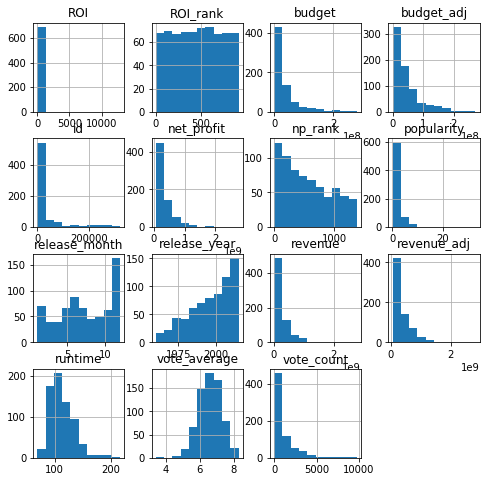

In [955]:
df_p.hist(figsize = (8,8))

In [956]:
df_p.nlargest(10, columns='net_profit')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,vote_average,release_year,budget_adj,revenue_adj,release_month,year_temp,net_profit,ROI,np_rank,ROI_rank
1329,11,tt0076759,12.04,"11,000,000.00","775,398,007.00",Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,http://www.starwars.com/films/star-wars-episod...,George Lucas,"A long time ago in a galaxy far, far away...",...,7.90,1977,"39,575,591.36","2,789,712,242.28",3,1977,"2,750,136,650.92",69.49,1,32
1386,19995,tt0499549,9.43,"237,000,000.00","2,781,505,847.00",Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,7.10,2009,"240,886,902.89","2,827,123,750.41",12,2009,"2,586,236,847.52",10.74,2,242
5231,597,tt0120338,4.36,"200,000,000.00","1,845,034,188.00",Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,http://www.titanicmovie.com/menu.html,James Cameron,Nothing on Earth could come between them.,...,7.30,1997,"271,692,064.21","2,506,405,735.42",11,1997,"2,234,713,671.21",8.23,3,337
10594,9552,tt0070047,2.01,"8,000,000.00","441,306,145.00",The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,http://theexorcist.warnerbros.com/,William Friedkin,Something almost beyond comprehension is happe...,...,7.20,1973,"39,289,276.63","2,167,324,901.20",12,1973,"2,128,035,624.57",54.16,4,43
9806,578,tt0073195,2.56,"7,000,000.00","470,654,000.00",Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,http://www.jaws25.com/,Steven Spielberg,Don't go in the water.,...,7.30,1975,"28,362,748.20","1,907,005,841.92",6,1975,"1,878,643,093.71",66.24,5,34
8889,601,tt0083866,2.90,"10,500,000.00","792,910,554.00",E.T. the Extra-Terrestrial,Henry Thomas|Drew Barrymore|Robert MacNaughton...,http://www.et20.com/,Steven Spielberg,He is afraid. He is alone. He is three million...,...,7.20,1982,"23,726,245.23","1,791,694,309.25",4,1982,"1,767,968,064.02",74.52,6,29
3,140607,tt2488496,11.17,"200,000,000.00","2,068,178,225.00",Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,7.50,2015,"183,999,919.04","1,902,723,129.80",12,2015,"1,718,723,210.76",9.34,7,283
8094,1642,tt0113957,1.14,"22,000,000.00","1,106,279,658.00",The Net,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,NaN,Irwin Winkler,Her driver's license. Her credit cards. Her ba...,...,5.60,1995,"31,481,271.08","1,583,049,536.35",7,1995,"1,551,568,265.28",49.29,8,50
10110,12230,tt0055254,2.63,"4,000,000.00","215,880,014.00",One Hundred and One Dalmatians,Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Ma...,NaN,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,The Canine Caper of the Century,...,6.60,1961,"29,179,444.83","1,574,814,739.70",1,1961,"1,545,635,294.87",52.97,9,45
7309,1891,tt0080684,5.49,"18,000,000.00","538,400,000.00",The Empire Strikes Back,Mark Hamill|Harrison Ford|Carrie Fisher|Billy ...,http://www.starwars.com/films/star-wars-episod...,Irvin Kershner,The Adventure Continues...,...,8.00,1980,"47,628,661.55","1,424,626,187.77",1,1980,"1,376,997,526.22",28.91,10,79


In [957]:
df_p.nlargest(10, columns='ROI')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,vote_average,release_year,budget_adj,revenue_adj,release_month,year_temp,net_profit,ROI,np_rank,ROI_rank
7447,23827,tt1179904,1.12,"15,000.00","193,355,800.00",Paranormal Activity,Katie Featherston|Micah Sloat|Mark Fredrichs|A...,http://www.paranormalactivity-movie.com/,Oren Peli,What Happens When You Sleep?,...,6.10,2007,"15,775.03","203,346,220.13",9,2007,"203,330,445.10","12,889.39",532,1
2449,2667,tt0185937,0.93,"25,000.00","248,000,000.00",The Blair Witch Project,Heather Donahue|Michael C. Williams|Joshua Leo...,http://www.blairwitch.com/,Daniel Myrick|Eduardo SÃ¡nchez,The scariest movie of all time is a true story.,...,6.30,1999,"32,726.32","324,645,105.96",7,1999,"324,612,379.63","9,919.00",310,2
7057,83,tt0374102,0.76,"130,000.00","54,667,954.00",Open Water,Blanchard Ryan|Daniel Travis|Saul Stein|Michae...,NaN,Chris Kentis,Scream all you want.,...,5.30,2004,"150,077.90","63,111,168.01",8,2004,"62,961,090.11",419.52,1367,7
9762,30497,tt0072271,0.91,"85,000.00","30,859,000.00",The Texas Chain Saw Massacre,Allen Danziger|Paul A. Partain|William Vail|Te...,NaN,Tobe Hooper,Who will survive and what will be left of them?,...,6.80,1974,"375,894.13","136,467,258.52",10,1974,"136,091,364.39",362.05,778,8
7827,9659,tt0079501,2.01,"400,000.00","100,000,000.00",Mad Max,Mel Gibson|Joanne Samuel|Hugh Keays-Byrne|Stev...,NaN,George Miller,The Maximum Force Of The Future,...,6.50,1979,"1,201,821.60","300,455,400.25",4,1979,"299,253,578.65",249.00,347,9
10759,948,tt0077651,1.20,"300,000.00","70,000,000.00",Halloween,Donald Pleasence|Jamie Lee Curtis|P.J. Soles|N...,http://www.theofficialjohncarpenter.com/hallow...,John Carpenter,The Night HE Came Home!,...,7.30,1978,"1,002,810.21","233,989,048.64",10,1978,"232,986,238.44",232.33,458,10
10606,838,tt0069704,0.68,"777,000.00","115,000,000.00",American Graffiti,Richard Dreyfuss|Ron Howard|Paul Le Mat|Charle...,NaN,George Lucas,Where were you in '62?,...,6.50,1973,"3,815,970.99","564,783,351.56",8,1973,"560,967,380.57",147.01,128,11
1372,12262,tt0077681,0.14,"230,000.00","25,000,000.00",The Hills Have Eyes,Martin Speer|Russ Grieve|John Steadman|James W...,NaN,Wes Craven,A nice American family. They didn't want to ki...,...,6.00,1977,"827,489.64","89,944,525.81",7,1977,"89,117,036.18",107.70,1098,16
7316,4488,tt0080761,1.25,"550,000.00","59,754,601.00",Friday the 13th,Betsy Palmer|Adrienne King|Harry Crosby|Laurie...,NaN,Sean S. Cunningham,They were warned...They are doomed...And on Fr...,...,6.40,1980,"1,455,320.21","158,112,870.40",5,1980,"156,657,550.19",107.64,686,17
10174,1366,tt0075148,2.39,"1,100,000.00","117,235,147.00",Rocky,Sylvester Stallone|Talia Shire|Burt Young|Carl...,NaN,John G. Avildsen,His whole life was a million-to-one shot.,...,7.20,1976,"4,214,867.83","449,209,681.63",11,1976,"444,994,813.80",105.58,201,18


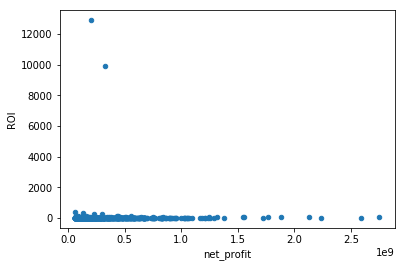

In [958]:
df_graph = df_p
df_graph.plot(x="net_profit", y="ROI", kind="scatter")

#plt.ylim(0, 70)
plt.show()

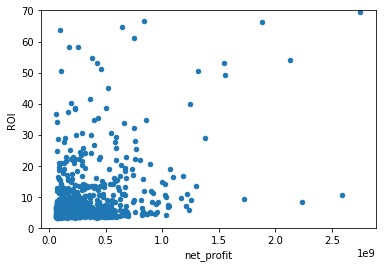

In [959]:
df_graph = df_p
df_graph.plot(x="net_profit", y="ROI", kind="scatter")

plt.ylim(0, 70)
plt.show()

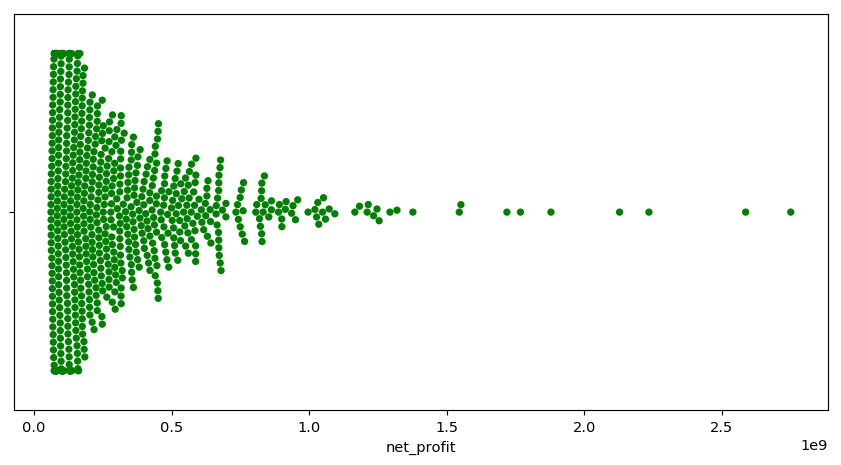

In [960]:
plt.figure(figsize=(10,5), dpi = 105)
#using seaborn to generate the plot
sns.swarmplot(df_graph['net_profit'], color = 'green')
#displaying the plot
plt.show()

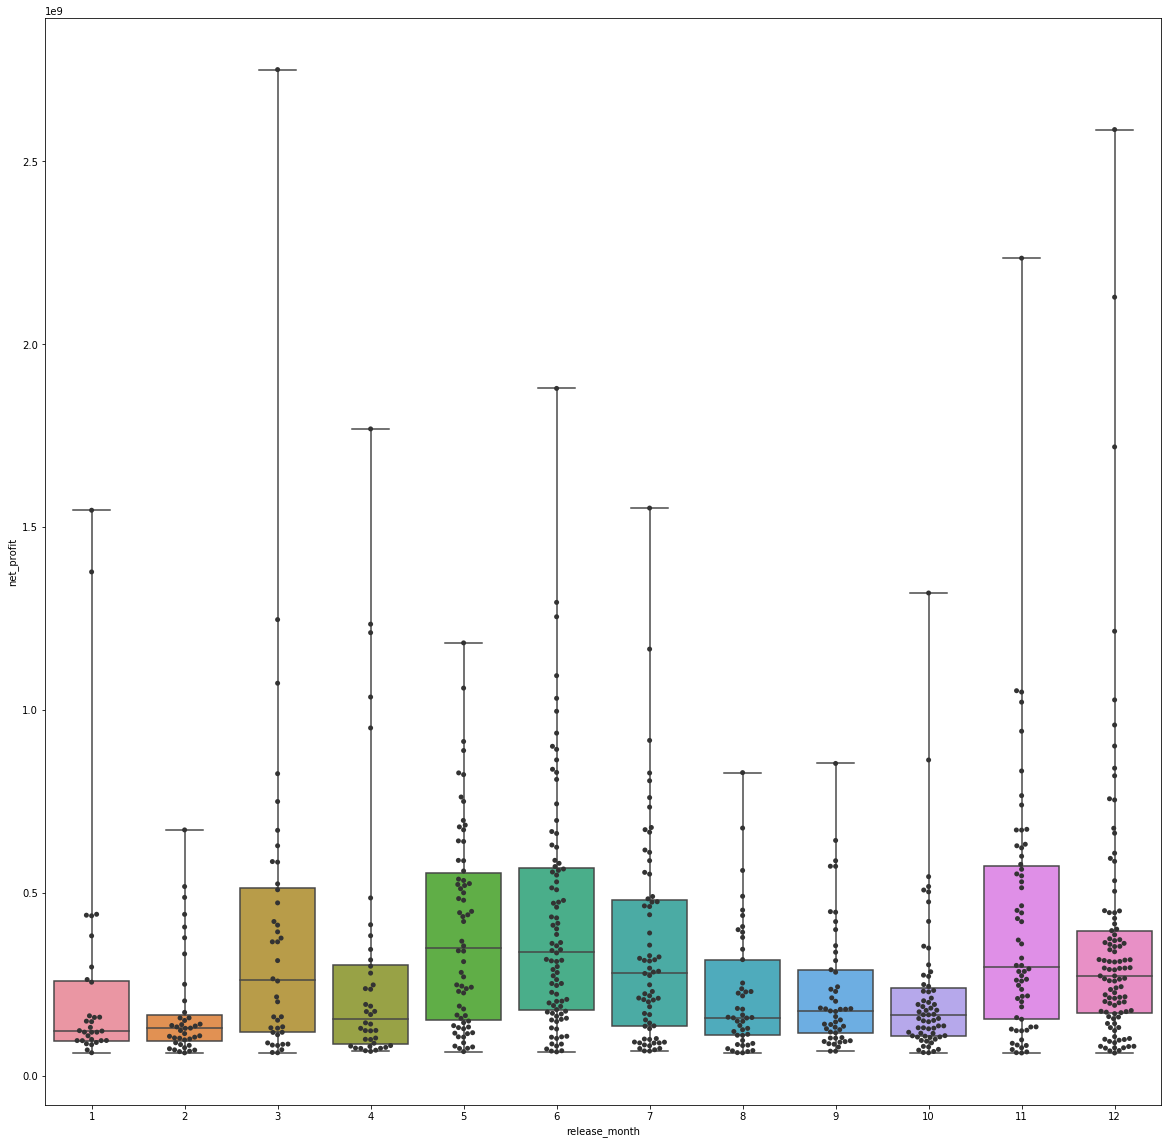

In [962]:
dims = (20, 20)
#seaborn is based off matplotlib Figure and Axis objects. So need to establish the dims in pyplot first. https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot
pyplot.subplots(figsize=dims)
sns.boxplot(x=df_p['release_month'], y=df_p['net_profit'], whis=np.inf)
sns.swarmplot(x=df_p['release_month'], y=df_p['net_profit'], color=".2")

#https://seaborn.pydata.org/generated/seaborn.swarmplot.html

In [970]:
#use groupby and agg function to specify what you want displayed in the output columns for one input columnL https://stackoverflow.com/questions/32751229/pandas-sum-by-groupby-but-exclude-certain-columns
df_p.groupby('release_month').agg({'vote_average': [np.median, np.mean],'runtime': [np.median, np.mean],'net_profit':[np.median, np.mean, np.sum, np.count_nonzero], 'ROI':[np.median,np.mean]})

vote_average      runtime            net_profit                 \
                    median mean  median   mean         median           mean   
release_month                                                                  
1                     6.10 6.09  101.00 103.65 123,086,299.47 256,018,230.48   
2                     6.40 6.48   99.00 102.18 129,451,045.34 178,967,740.08   
3                     6.50 6.58  110.00 112.20 261,747,057.09 401,166,654.02   
4                     6.50 6.61  110.00 113.17 155,731,037.73 306,713,000.85   
5                     6.50 6.53  112.50 112.08 348,033,562.42 396,451,613.26   
6                     6.60 6.61  112.50 114.62 338,725,740.05 426,609,828.88   
7                     6.50 6.62  109.00 109.93 279,358,305.64 351,111,767.80   
8                     6.90 6.64  105.00 107.44 158,927,897.35 227,266,405.29   
9                     6.70 6.71  110.00 110.04 176,907,040.41 234,352,228.07   
10                    6.60 6.52  103.00 106.70 166,284,291.75 222,234,658.93   
11                    6.90 6.80  119.50 118.06 296,611,608.90 411,107,793.90   
12                    6.90 6.81  122.00 125.50 272,728,677.91 372,804,876.29   

                                                 ROI         
                            sum count_nonzero median   mean  
release_month                                                
1              7,936,565,144.99         31.00   5.79  13.13  
2              6,979,741,863.06         39.00   5.78  10.56  
3             16,046,666,161.00         40.00   6.03  11.09  
4             12,268,520,034.05         40.00   5.96  14.32  
5             26,165,806,475.16         66.00   6.20   9.50  
6             37,541,664,941.24         88.00   6.91   9.12  
7             23,524,488,442.39         67.00   7.27 159.76  
8             10,226,988,238.09         45.00   7.49  27.78  
9             11,483,259,175.58         49.00   6.41 275.18  
10            14,000,783,512.31         63.00   9.12  24.86  
11            25,488,683,221.95         62.00   7.08  11.36  
12            37,653,292,505.30        101.00   7.18  11.26

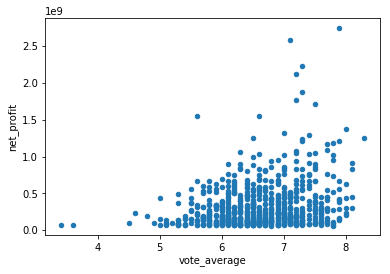

In [894]:
df_graph = df_p
df_graph.plot(x="vote_average", y="net_profit", kind="scatter")
plt.show()

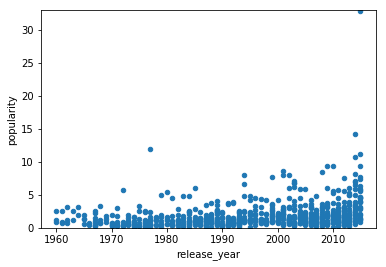

In [1027]:
#check popularity
df_p.plot(x="release_year", y="popularity", kind="scatter")

plt.ylim(0, 33)
plt.show()

In [205]:
# there isn't a lot of vote_counts for some of these movies. Let's assume anything with at least 100 votes is valid. And let's only include budgets greater than 
df = df[df['vote_count'] > 100]
df.shape

release_date    datetime64[ns]
release_year             int64
dtype: object


C:\Users\MyTecra\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\MyTecra\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\MyTecra\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_profit,return,np_rank
1329,11,tt0076759,12.04,"11,000,000.00","775,398,007.00",Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,http://www.starwars.com/films/star-wars-episod...,George Lucas,"A long time ago in a galaxy far, far away...",...,Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,4428,7.90,1970,"39,575,591.36","2,789,712,242.28","2,750,136,650.92",69.49,1
1386,19995,tt0499549,9.43,"237,000,000.00","2,781,505,847.00",Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.10,1970,"240,886,902.89","2,827,123,750.41","2,586,236,847.52",10.74,2


In [206]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [207]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [208]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!